#PREVISÃO DE DEMANDA

Previsão de demanda é uma projeção realizada com o intuito de prever o potencial de vendas de um ou mais produtos em um cenário futuro.

Com base em dados e informações, numéricas e intencionais, o objetivo da previsão é aproximar ao máximo a perspectiva da realidade. Embora não seja possível determinar as ações do futuro, a estimativa permite guiar a tomada de decisão e elaborar um planejamento mais estratégico, voltado para as possibilidades reais do negócio.

Nos diversos setores, a previsão de demanda serve de amparo para nortear e orientar as ações mais importantes.

Nós, da Frexco, trabalhamos com produtos perecíveis e muitos deles possuem uma data de validade curta. Acertar na previsão de demanda é essencial para evitarmos o desperdício de alimentos, além de também ser importante garantir que tenhamos o produto disponível no estoque para venda.

Tendo isso em mente, estruture um script no Python que calcule a previsão de demanda para os próximos 5 dias do item, baseando-se no histórico presente na base de dados em anexo.

# **Previsão de demanda com SÉRIES TEMPORAIS usando a biblioteca PyCaret**
PyCaret é uma biblioteca do Python que permite que você faça todo o ciclo da criação de um modelo de Machine Learning com poucas linhas de código.

Primeiros vamos importar a biblioteca Pandas e em seguida visualizar a nossa base de dados atribuindo à variável 'dados'.

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_excel('Dados.xlsx')
dados

,Data,Vendas
0,2022-12-06,870
1,2022-12-07,868
2,2022-12-08,1189
3,2022-12-09,742
4,2022-12-10,317
5,2022-12-11,685
6,2022-12-12,1366
7,2022-12-13,1213
8,2022-12-14,1055
9,2022-12-15,1343


# **Tratando a tabela**
Como o projeto será feito com séries temporais, é necessário verificar se o formato de data é *datetime* e transformar o campo *Data* em índice.

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    46 non-null     datetime64[ns]
 1   Vendas  46 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 864.0 bytes


In [ ]:
dados.set_index('Data', inplace=True)

In [ ]:
dados

,Vendas
Data,
2022-12-06,870
2022-12-07,868
2022-12-08,1189
2022-12-09,742
2022-12-10,317
2022-12-11,685
2022-12-12,1366
2022-12-13,1213
2022-12-14,1055


In [ ]:
dados.shape

(46, 1)

Agora sim! O datafreme tem apenas uma coluna. Isso quer dizer que a coluna vendas se transformou em um índice

# **Viualizando a série de vendas com gráfico de linha**

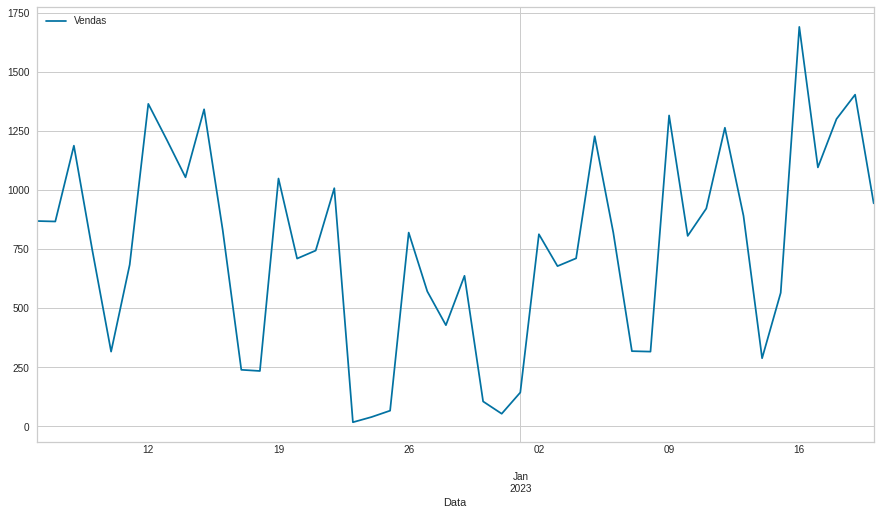

In [ ]:
dados.plot(figsize = (15,8));

No gráfcio acima podemos visualizar fácilmente que nos períodos de véspera de natal e de reveillon foram os períodos em que houve menos vedas.

# **Visualizando a quantidade de vandas a cada 5 dias**
É importante separar em blocos de cinco para ter uma noção melhor da quantidade vendida, tendo em vista que o problema pede a predição para os próximos 5 dias.

In [ ]:
from pandas.core import resample
dados.resample('5D').sum()

,Vendas
Data,
2022-12-06,3986
2022-12-11,5662
2022-12-16,3068
2022-12-21,1879
2022-12-26,2566
2022-12-31,2403
2023-01-05,4003
2023-01-10,4176
2023-01-15,6062


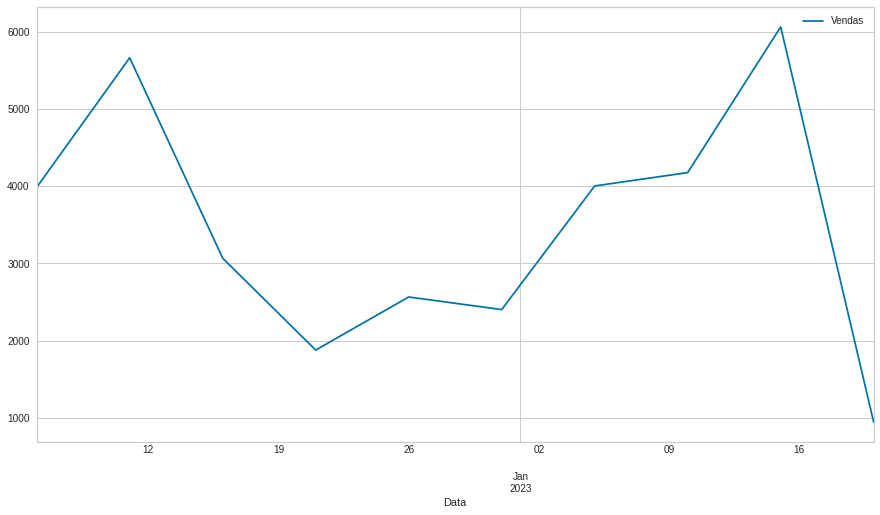

In [ ]:
dados.resample('5D').sum().plot(figsize = (15,8));

# **Modelo de machine learning para prever as vendas**
Em seguida encontrar o melhor modelo para aplicar nossa predição

In [ ]:
from pycaret.time_series import *

Aplicar para prever os próximos 5 dias

In [ ]:
setup(dados, fh = 5, fold = 5)

INFO:logs:PyCaret TSForecastingExperiment
INFO:logs:Logging name: ts-default-name
INFO:logs:ML Usecase: MLUsecase.TIME_SERIES
INFO:logs:version 3.0.0
INFO:logs:Initializing setup()
INFO:logs:self.USI: 745c
INFO:logs:self.variable_keys: {'fold_param', 'USI', '_all_metrics', 'seasonal_period', 'y', 'exogenous_present', 'variable_keys', 'fold_generator', 'y_train_transformed', 'index_type', '_ml_usecase', 'y_test_transformed', 'exp_name_log', 'strictly_positive', 'y_test', 'X', 'primary_sp_to_use', 'seed', 'logging_param', 'y_transformed', 'data', '_available_plots', 'idx', 'gpu_param', 'X_test', 'enforce_pi', 'all_sp_values', 'fh', 'html_param', 'enforce_exogenous', '_all_models_internal', 'exp_id', 'memory', 'experiment__', 'X_train', 'log_plots_param', 'master_model_container', 'y_train', 'pipeline', 'n_jobs_param', '_gpu_n_jobs_param', '_all_models', 'approach_type', 'display_container', 'X_transformed', 'X_test_transformed', 'fold_groups_param_full', 'X_train_transformed', 'seasonali

,Description,Value
0,session_id,4291
1,Target,Vendas
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(46, 1)"
5,Train data shape,"(41, 1)"
6,Test data shape,"(5, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,5
9,Enforce Prediction Interval,False


INFO:logs:setup() successfully completed in 0.2s...............


Como já era visível e eperado foi encontrado sazonalidade

**Agora iremos encontrao o melhor modelo**

In [ ]:
best_model = compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,207.4583,269.3823,2.1808,0.5286,0.7689,0.832,0.3916,0.028
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,230.6449,283.662,3.0489,0.5971,0.853,0.8808,0.3254,0.158
snaive,Seasonal Naive Forecaster,244.76,304.5255,2.4495,0.6135,0.9066,0.9437,0.1805,0.016
arima,ARIMA,178.0437,228.085,1.7743,0.6471,0.6534,0.702,0.4785,0.072
theta,Theta Forecaster,259.2483,312.7379,1.8964,0.6487,0.9607,0.9645,-0.0143,0.042
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,246.8617,314.6275,2.7906,0.6494,0.9157,0.9722,0.1534,0.074
ets,ETS,259.0499,309.0577,1.951,0.6513,0.9698,0.96,0.0258,0.084
grand_means,Grand Means Forecaster,357.9308,429.2141,4.2839,0.664,1.3095,1.3196,-0.7379,0.014
croston,Croston,357.2335,423.7215,4.0443,0.6808,1.3142,1.3057,-0.5807,0.012
exp_smooth,Exponential Smoothing,282.5729,334.8638,1.8945,0.6822,1.0555,1.036,-0.0943,0.060


INFO:logs:master_model_container: 84
INFO:logs:display_container: 4
INFO:logs:BaseCdsDtForecaster(regressor=DecisionTreeRegressor(random_state=4291), sp=7,
                    window_length=7)
INFO:logs:compare_models() successfully completed......................................


Ok! Vimos que o melhor modelo é o ***dt_cds_dt	Decision Tree w/ Cond. Deseasonalize & Detrending***. Então iremos aplicá-lo.

In [ ]:
# Atribuindo o modelo à uma variável de mesmo nome
dt_cds_dt = create_model('dt_cds_dt')

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2022-12-21,202.3788,327.7915,8.6064,0.7667,0.7499,1.0724,0.4249
1,2022-12-26,137.1636,170.5109,1.3087,0.5718,0.4601,0.4843,0.4902
2,2022-12-31,191.0472,273.1528,0.2599,0.3188,0.7115,0.8418,0.3796
3,2023-01-05,306.8520,350.1156,0.4400,0.6330,1.1942,1.0964,0.1211
4,2023-01-10,199.8500,225.3408,0.2888,0.3528,0.7289,0.6652,0.5424
Mean,NaT,207.4583,269.3823,2.1808,0.5286,0.7689,0.8320,0.3916
SD,NaT,55.0881,65.8163,3.2357,0.1699,0.2373,0.2352,0.1462


INFO:logs:master_model_container: 85
INFO:logs:display_container: 5
INFO:logs:BaseCdsDtForecaster(regressor=DecisionTreeRegressor(random_state=4291), sp=7,
                    window_length=7)
INFO:logs:create_model() successfully completed......................................


# Vizualizando o resultado

Gráfico de decomposição

In [ ]:
plot_model(dt_cds_dt, plot='train_test_split');

INFO:logs:Visual Rendered Successfully


In [ ]:
final = finalize_model(dt_cds_dt)

In [ ]:
final

BaseCdsDtForecaster(regressor=DecisionTreeRegressor(random_state=4291), sp=7,
                    window_length=7)

In [ ]:
plot_model(final, plot = 'forecast')

INFO:logs:Visual Rendered Successfully


**Abaixo, os valores da previsão de demanda para os próximos 5 dias**

In [ ]:
pred = predict_model(final, fh = 5)
pred.round(2)

,y_pred
2023-01-21,481.03
2023-01-22,858.93
2023-01-23,1327.13
2023-01-24,847.10
2023-01-25,378.93


In [ ]:
pred.sum().round(2)

y_pred    3893.12
dtype: float64